#### Практична робота
# Моделювання процесів теплопередачі методом скінченних різниць

## Теоретичні основи та застосування рівнянь теплопровідності Фур'є

#### Вступ

Рівняння теплопровідності Фур'є є фундаментальними диференціальними рівняннями математичної фізики, що описують процеси поширення тепла в суцільному середовищі. Ці рівняння, вперше сформульовані Жозефом Фур'є в 1822 році в його праці "Аналітична теорія тепла", стали основою для розвитку теорії параболічних диференціальних рівнянь та знайшли широке застосування в різних галузях науки і техніки.

### 1. Математична постановка задачі

#### 1.1 Одновимірне рівняння теплопровідності

Одновимірне рівняння теплопровідності має вигляд:

$$ \frac{\partial u}{\partial t} = a \frac{\partial^2 u}{\partial x^2} $$

де:
- $u(x,t)$ - температура в точці $x$ в момент часу $t$
- $a$ - коефіцієнт температуропровідності матеріалу
- $x$ - просторова координата
- $t$ - час

#### 1.2 Двовимірне рівняння теплопровідності

Двовимірне рівняння теплопровідності описується виразом:

$$ \frac{\partial u}{\partial t} = a \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right) $$

де додатково:
- $y$ - друга просторова координата

### 2. Фізичний зміст

#### 2.1 Коефіцієнт температуропровідності

Коефіцієнт температуропровідності $a$ визначається як:

$$ a = \frac{\lambda}{\rho c_p} $$

де:
- $\lambda$ - коефіцієнт теплопровідності матеріалу [Вт/(м·К)]
- $\rho$ - густина матеріалу [кг/м³]
- $c_p$ - питома теплоємність при постійному тиску [Дж/(кг·К)]

#### 2.2 Фізична інтерпретація

Рівняння теплопровідності відображає фундаментальний закон природи: швидкість зміни температури в точці пропорційна кривизні температурного профілю в околі цієї точки. Математично це виражається через другу похідну температури по координаті.

### 3. Математичні властивості

#### 3.1 Класифікація рівняння

Рівняння теплопровідності належить до класу:
1. Параболічних диференціальних рівнянь
2. Лінійних рівнянь
3. Рівнянь другого порядку за просторовими змінними
4. Рівнянь першого порядку за часом

#### 3.2 Основні властивості розв'язків

1. **Принцип максимуму**: температура в будь-якій внутрішній точці області не може перевищувати максимального значення температури на границі області та в початковий момент часу.

2. **Згладжуючий ефект**: розв'язки мають властивість нескінченної диференційованості при $t > 0$, навіть якщо початкові умови розривні.

3. **Необоротність**: процес теплопровідності є незворотним у часі, що математично виражається через порушення єдиності розв'язку при заміні $t$ на $-t$.

### 4. Методи розв'язання

#### 4.1 Аналітичні методи

1. **Метод розділення змінних (метод Фур'є)**:
   $$ u(x,t) = X(x)T(t) $$
   
2. **Метод функції Гріна**:
   $$ u(x,t) = \int_0^L G(x,\xi,t)f(\xi)d\xi $$

3. **Перетворення Лапласа**:
   $$ \tilde{u}(x,s) = \mathcal{L}\{u(x,t)\} = \int_0^\infty u(x,t)e^{-st}dt $$

#### 4.2 Чисельні методи

1. **Метод кінцевих різниць**:
   
   Для одновимірного випадку:
   $$ \frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2} $$
   
   Для двовимірного випадку:
   $$ \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \approx \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2} + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{(\Delta y)^2} $$

2. **Метод кінцевих елементів**
3. **Спектральні методи**

#### 4.3 Реалізований метод розв'язання

У даній роботі для розв'язання рівнянь теплопровідності обрано комбінований підхід, що базується на методі кінцевих різниць для просторової дискретизації та методі Рунге-Кутти для інтегрування за часом.

#### 4.3.1 Просторова дискретизація

**Одновимірний випадок**:
```python
unew[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2]) * a/dx**2
```

Ця формула реалізує класичну схему центральних різниць другого порядку точності для апроксимації другої похідної по координаті.

**Двовимірний випадок**:
```python
unew[1:-1,1:-1] = (u[2:,1:-1] - 2*u[1:-1,1:-1] + u[:-2,1:-1]) * a/dx**2 + \
                  (u[1:-1,2:] - 2*u[1:-1,1:-1] + u[1:-1,:-2]) * a/dy**2
```

Тут використовується розширення одновимірної схеми на двовимірний випадок з роздільною апроксимацією похідних по кожній координаті.

#### 4.3.2 Часова дискретизація

Для інтегрування за часом використовується метод Рунге-Кутти 4-5 порядку (`RK45`), реалізований у функції `solve_ivp` з бібліотеки `scipy.integrate`. Цей метод має наступні переваги:
1. Адаптивний вибір кроку за часом
2. Автоматичний контроль локальної похибки
3. Висока точність розв'язку
4. Хороша стійкість для жорстких систем

#### 4.3.3 Особливості реалізації

1. **Векторизація обчислень**:
   - Використання numpy для ефективної роботи з масивами
   - Уникнення явних циклів по просторовим змінним
   - Значне прискорення обчислень порівняно з поелементною обробкою

2. **Граничні умови**:
   - Реалізовані умови Діріхле (фіксована температура на границях)
   - Можливість легкого розширення для інших типів умов
   - Коректна обробка кутових точок у двовимірному випадку

3. **Оптимізація пам'яті**:
   - Перевикористання масивів для зберігання проміжних результатів
   - Ефективна робота з великими сітками
   - Мінімізація копіювання даних

#### 4.3.4 Обґрунтування вибору методу

1. **Метод кінцевих різниць** обрано через:
   - Простоту реалізації та розуміння
   - Природну векторизацію обчислень
   - Хорошу точність при достатньо малому кроці сітки
   - Легкість модифікації для різних типів граничних умов
   - Ефективність для прямокутних областей

2. **Метод Рунге-Кутти** обрано через:
   - Високий порядок точності
   - Адаптивний вибір кроку
   - Надійність та стійкість
   - Наявність готової оптимізованої реалізації в scipy

#### 4.3.5 Переваги та обмеження

**Переваги**:
1. Висока обчислювальна ефективність
2. Простота реалізації та модифікації
3. Природна паралелізація обчислень
4. Хороша точність розв'язку
5. Надійність та стійкість

**Обмеження**:
1. Обмеження на форму області (прямокутна сітка)
2. Необхідність дрібної сітки для складних розв'язків
3. Можливі осциляції при різких змінах температури
4. Підвищені вимоги до пам'яті для великих сіток

### 5. Практичне застосування

#### 5.1 Інженерні застосування

1. Теплоізоляція будівель
2. Системи охолодження електронних пристроїв
3. Проектування теплообмінників
4. Термічна обробка матеріалів

#### 5.2 Застосування в інших галузях науки

1. **Дифузійні процеси**:
   - Поширення забруднень
   - Дифузія речовин у біологічних системах

2. **Фінансова математика**:
   - Рівняння Блека-Шоулза
   - Аналіз фінансових ризиків

3. **Обробка зображень**:
   - Згладжування та фільтрація
   - Відновлення пошкоджених зображень

4. **Біологічні процеси**:
   - Моделювання росту популяцій
   - Поширення епідемій

### 6. Граничні умови

#### 6.1 Типи граничних умов

Граничні умови визначають поведінку системи на межах області розрахунку. У задачах теплопровідності розрізняють три основних типи граничних умов:

1. **Умови Діріхле** (першого роду):
   $$ u|_{\partial \Omega} = f(x,t) $$
   
   Фізична інтерпретація:
   - Задається конкретне значення температури на границі області
   - Температура на границі підтримується постійною або змінюється за заданим законом
   - Приклади:
     - Нагрівання стрижня з фіксованою температурою на кінцях
     - Охолодження пластини, зануреної в середовище з постійною температурою
     - Теплообмін з термостатом

2. **Умови Неймана** (другого роду):
   $$ \left.\frac{\partial u}{\partial n}\right|_{\partial \Omega} = g(x,t) $$
   
   де $\frac{\partial u}{\partial n}$ - похідна по нормалі до границі області.
   
   Фізична інтерпретація:
   - Задається тепловий потік через границю області
   - Описує інтенсивність теплообміну на границі
   - Особливі випадки:
     - $g(x,t) = 0$ - теплоізольована границя
     - $g(x,t) = const$ - постійний тепловий потік
   - Приклади:
     - Теплоізольований кінець стрижня
     - Нагрівання тіла постійним тепловим потоком
     - Радіаційний теплообмін

3. **Умови Робіна** (третього роду):
   $$ \left.\left(\alpha \frac{\partial u}{\partial n} + \beta u\right)\right|_{\partial \Omega} = h(x,t) $$
   
   де:
   - $\alpha$ - коефіцієнт теплопровідності матеріалу
   - $\beta$ - коефіцієнт теплообміну з навколишнім середовищем
   
   Фізична інтерпретація:
   - Описує конвективний теплообмін з навколишнім середовищем
   - Тепловий потік пропорційний різниці температур тіла та середовища
   - Найбільш реалістичний тип граничних умов
   - Приклади:
     - Охолодження тіла в повітрі
     - Теплообмін через стінку
     - Природна конвекція

#### 6.2 Комбіновані граничні умови

У реальних задачах часто зустрічаються комбінації різних типів граничних умов:

1. **Змішані граничні умови**:
   - Різні типи умов на різних частинах границі
   - Приклад: стрижень з фіксованою температурою на одному кінці та теплоізоляцією на іншому

2. **Нелінійні граничні умови**:
   $$ \left.\left(\alpha \frac{\partial u}{\partial n} + \beta u^4\right)\right|_{\partial \Omega} = h(x,t) $$
   - Враховують радіаційний теплообмін (закон Стефана-Больцмана)
   - Використовуються при високих температур

#### 6.3 Початкові умови

Для однозначного визначення розв'язку необхідно задати початковий розподіл температури:

$$ u(x,0) = \phi(x) $$

Вимоги до початкових умов:
1. **Узгодженість з граничними умовами**:
   - Значення $\phi(x)$ на границі повинні відповідати граничним умовам
   - Для умов другого роду похідна $\phi'(x)$ також має узгоджуватися

2. **Гладкість**:
   - Для класичного розв'язку функція $\phi(x)$ має бути достатньо гладкою
   - При розривній функції $\phi(x)$ розв'язок існує в узагальненому сенсі

3. **Фізична реалізованість**:
   - Початкові умови повинні відповідати фізично можливим станам системи
   - Температура має бути обмеженою та фізично допустимою

#### 6.4 Коректність постановки задачі

Для коректної постановки задачі теплопровідності необхідно:

1. **Існування розв'язку**:
   - Граничні та початкові умови мають бути узгодженими
   - Коефіцієнти рівняння повинні задовольняти певним умовам регулярності

2. **Єдиність розв'язку**:
   - Теорема єдиності гарантує, що задача має не більше одного розв'язку
   - Важливо для практичного застосування

3. **Неперервна залежність від даних**:
   - Малі зміни початкових та граничних умов призводять до малих змін розв'язку
   - Забезпечує стійкість чисельних методів

### 7. Висновки

Рівняння теплопровідності Фур'є є потужним математичним інструментом для моделювання широкого класу фізичних процесів. Їх універсальність та математична елегантність зробили їх одними з найважливіших рівнянь математичної фізики. Розвиток чисельних методів їх розв'язання відкрив нові можливості для практичного застосування в різних галузях науки і техніки.

### Література

1. Fourier, J. (1822). Théorie analytique de la chaleur. Firmin Didot.

## Метод скінченних різниць

### Вступ

Метод скінченних різниць (МСР) є одним з фундаментальних числових методів для розв'язання диференціальних рівнянь. Цей метод базується на заміні диференціальних операторів їх дискретними аналогами - різницевими операторами. Такий підхід дозволяє перетворити диференціальне рівняння в систему алгебраїчних рівнянь, яку можна розв'язати числовими методами.

### Основні поняття

#### Дискретизація

Для застосування методу скінченних різниць спочатку необхідно розбити область розв'язку на дискретні точки. У випадку двовимірної задачі область покривається сіткою з кроками Δx та Δy по відповідних напрямках. Кожній точці сітки присвоюються індекси (i,j), де:
- i - номер точки по горизонтальній осі
- j - номер точки по вертикальній осі

#### Різницеві схеми

Основою методу є заміна похідних їх скінченно-різницевими аналогами. Розглянемо основні типи різницевих схем:

#### Перша похідна

Різницева схема для першої похідної може бути представлена трьома способами:

1. Вперед (прямі різниці):
```
∂f/∂x ≈ (f(i+1) - f(i)) / Δx
```

2. Назад (зворотні різниці):
```
∂f/∂x ≈ (f(i) - f(i-1)) / Δx
```

3. Центральні різниці:
```
∂f/∂x ≈ (f(i+1) - f(i-1)) / (2Δx)
```

#### Друга похідна

Для другої похідної найчастіше використовується центральна різницева схема:
```
∂²f/∂x² ≈ (f(i+1) - 2f(i) + f(i-1)) / (Δx)²
```

### Приклад застосування: рівняння теплопровідності

Розглянемо застосування методу скінченних різниць для розв'язання стаціонарного рівняння теплопровідності у двовимірному випадку:

∂²T/∂x² + ∂²T/∂y² = 0

#### Дискретизація рівняння

Застосовуючи центральні різниці для обох других похідних, отримуємо:
```
(Ti+1,j - 2Ti,j + Ti-1,j)/(Δx)² + (Ti,j+1 - 2Ti,j + Ti,j-1)/(Δy)² = 0
```

Для випадку рівномірної сітки (Δx = Δy), після перегрупування членів отримуємо:
```
Ti,j = (Ti-1,j + Ti+1,j + Ti,j+1 + Ti,j-1) / 4
```

Це рівняння показує, що температура в кожній точці сітки дорівнює середньому арифметичному температур у чотирьох сусідніх точках.

### Переваги та недоліки методу

#### Переваги:
- Простота реалізації
- Наочність фізичного змісту
- Можливість легкого врахування граничних умов
- Добра збіжність для багатьох типів задач

#### Недоліки:
- Необхідність використання досить дрібної сітки для отримання точних результатів
- Можливі проблеми зі стійкістю для деяких типів задач
- Складність врахування складної геометрії області

### Застосування

Метод скінченних різниць широко використовується в різних областях:

1. Теплопередача та термодинаміка:
   - Розрахунок розподілу температур
   - Моделювання процесів охолодження
   - Аналіз теплових потоків

2. Гідродинаміка:
   - Розрахунок течій рідин та газів
   - Моделювання хвильових процесів
   - Аналіз турбулентності

3. Електромагнетизм:
   - Розрахунок електричних та магнітних полів
   - Моделювання хвильових процесів
   - Аналіз електромагнітної сумісності

4. Структурна механіка:
   - Розрахунок деформацій
   - Аналіз напружень
   - Моделювання коливань

### Практичні рекомендації

При використанні методу скінченних різниць важливо враховувати наступні аспекти:

1. Вибір кроку сітки:
   - Має бути достатньо малим для забезпечення точності
   - Але не занадто малим, щоб уникнути надмірних обчислювальних витрат
   - Рекомендується проводити тестування збіжності при різних розмірах сітки

2. Вибір різницевої схеми:
   - Для стаціонарних задач підходять центральні різниці
   - Для нестаціонарних задач може знадобитися використання неявних схем
   - При наявності великих градієнтів можуть знадобитися схеми підвищеного порядку точності

3. Граничні умови:
   - Необхідно коректно задавати граничні умови
   - Враховувати особливості геометрії області
   - При необхідності використовувати спеціальні прийоми для складних границь

### Висновок

Метод скінченних різниць є потужним інструментом числового розв'язання диференціальних рівнянь. Його простота та наочність роблять його особливо привабливим для інженерних розрахунків та наукових досліджень. Розуміння основних принципів методу та його особливостей дозволяє ефективно застосовувати його для розв'язання широкого кола практичних задач.


## Порівняльний аналіз одновимірної та двовимірної моделей теплопровідності

### Вступ

Проведено порівняльний аналіз двох числових моделей теплопровідності: одновимірної та двовимірної. Обидві моделі базуються на фундаментальному рівнянні теплопровідності та використовують метод кінцевих різниць для дискретизації просторових похідних у поєднанні з методом Рунге-Кутти 4-5 порядку для часової еволюції.

### Математичні моделі

#### Одновимірна модель
Базується на рівнянні:
```
∂u/∂t = a * ∂²u/∂x²
```

#### Двовимірна модель
Розширює одновимірний випадок додаванням другої просторової координати:
```
∂u/∂t = a * (∂²u/∂x² + ∂²u/∂y²)
```

### Порівняльний аналіз реалізації

#### Структурні відмінності

| Характеристика | Одновимірна модель | Двовимірна модель |
|----------------|-------------------|-------------------|
| Розмірність сітки | 100 точок | 100×100 точок |
| Кількість граничних умов | 2 (краї) | 4 (сторони) |
| Складність обчислень | O(n) | O(n²) |

### Область застосування

#### *Одновимірна модель*

#### Оптимальні випадки застосування:
1. **Лінійні об'єкти**:
   - Теплопровідні стержні
   - Дроти та кабелі
   - Трубопроводи з однорідною ізоляцією

2. **Спрощені моделі**:
   - Попередній аналіз теплових процесів
   - Освітні цілі
   - Швидка оцінка теплових характеристик

#### Обмеження:
- Неможливість врахування поперечних теплових потоків
- Спрощена геометрія
- Обмежена точність для реальних об'єктів

#### *Двовимірна модель*

#### Оптимальні випадки застосування:
1. **Пласкі об'єкти**:
   - Теплопровідні пластини
   - Теплові екрани
   - Друковані плати
   - Будівельні панелі

2. **Перерізи складних об'єктів**:
   - Теплоізоляційні конструкції
   - Багатошарові стіни
   - Теплообмінники

3. **Інженерні задачі**:
   - Термічна обробка матеріалів
   - Проектування теплозахисних систем
   - Оптимізація теплових режимів

#### Обмеження:
- Не враховується теплообмін по третій координаті
- Однорідність матеріалу
- Відсутність внутрішніх джерел тепла

### Висновки

Проведений аналіз демонструє, що обидві моделі мають свої специфічні області застосування та обмеження. Одновимірна модель є ефективним інструментом для швидкого аналізу простих систем та освітніх цілей, тоді як двовимірна модель надає більш реалістичний опис теплових процесів у складних системах.

Основні переваги двовимірної моделі полягають у можливості:
1. Більш точного моделювання реальних фізичних процесів
2. Врахування складних граничних умов
3. Аналізу неоднорідних теплових полів

Проте, ця перевага супроводжується значним збільшенням обчислювальної складності та вимог до ресурсів.

Подальші вдосконалення моделей можуть включати:
- Врахування внутрішніх джерел тепла
- Імплементацію змінних коефіцієнтів теплопровідності
- Розширення до тривимірного випадку
- Додавання можливості моделювання неоднорідних матеріалів

### Рекомендації щодо вибору моделі

1. **Використовуйте одновимірну модель, коли**:
   - Геометрія об'єкта має чітко виражений одновимірний характер
   - Потрібна швидка попередня оцінка
   - Ресурси обчислювальної системи обмежені
   - Проводиться початковий аналіз проблеми

2. **Використовуйте двовимірну модель, коли**:
   - Необхідна висока точність результатів
   - Геометрія об'єкта має суттєві особливості в двох вимірах
   - Важливий детальний аналіз теплових полів
   - Проводиться фінальна верифікація проектних рішень


# Одновимірне рівняння теплопровідності

## Постановка задачі
Даний скрипт розв'язує одновимірне рівняння теплопровідності:

$$ \frac{\partial}{\partial t} u(x,t) = a \frac{\partial^2}{\partial x^2} u(x,t) $$

де:
- $u(x,t)$ - температура в точці x в момент часу t
- $a$ - коефіцієнт температуропровідності
- $t$ - час
- $x$ - просторова координата

## Метод розв'язання
1. Використовуємо метод кінцевих різниць для дискретизації просторової похідної
2. Для розв'язку системи диференціальних рівнянь використовуємо метод Рунге-Кутти 4-5 порядку
3. Візуалізуємо результати за допомогою графіків температури та теплових карт

## Граничні умови
Реалізовано два типи граничних умов:
1. Подвійна пряма та зворотня різниця на краях
2. Постійна температура на краях (температурна ванна)

## Теоретичні основи

Рівняння теплопровідності описує процес поширення тепла в середовищі. У одновимірному випадку воно має вигляд:

$$ \frac{\partial}{\partial t} u(x,t) = a \frac{\partial^2}{\partial x^2} u(x,t) $$

де $u(x,t)$ - це температура в точці x в момент часу t, представлена як масив ${u_1, u_2, \dots, u_n}$.

### Дискретизація

Для чисельного розв'язку використовуємо метод кінцевих різниць. Просторова похідна апроксимується як:

$$ \frac{\partial^2}{\partial x^2} u_j = \frac{u_{j+1}-2u_{j}+u_{j-1}}{(\Delta x)^2} $$

Для граничних точок використовуємо:

$$ \frac{\partial^2}{\partial x^2} u_1 = \frac{u_{1}-2u_{2}+u_{3}}{(\Delta x)^2} $$

$$ \frac{\partial^2}{\partial x^2} u_n = \frac{u_{n}-2u_{n-1}+u_{n-2}}{(\Delta x)^2} $$

### Система рівнянь

Після дискретизації отримуємо систему зв'язаних рівнянь:

$$ \begin{align*}
\frac{\partial}{\partial t}u_1 &= \frac{a}{(\Delta x)^2}(u_1-2u_2+u_3) \\
\frac{\partial}{\partial t}u_2 &= \frac{a}{(\Delta x)^2}(u_1-2u_2+u_3) \\
\frac{\partial}{\partial t}u_3 &= \frac{a}{(\Delta x)^2}(u_2-2u_3+u_4) \\
&\vdots \\
\frac{\partial}{\partial t}u_j &= \frac{a}{(\Delta x)^2}(u_{j-1}-2u_j+u_{j+1}) \\
&\vdots \\
\frac{\partial}{\partial t}u_n &= \frac{a}{(\Delta x)^2}(u_{n-2}-2u_{n-1}+u_n)
\end{align*} $$

## Реалізація

Базова реалізація одновимірної теплопровідності представлена у вигляді:
- Метод скінченних різниць для 1D випадку
- Два варіанти граничних умов
- Візуалізація результатів

#### Імпорт необхідних бібліотек

In [1]:
import numpy as np          # для роботи з масивами та математичними операціями
import matplotlib.pyplot as plt  # для візуалізації результатів
from scipy import integrate     # для чисельного інтегрування

#### Визначення параметрів системи

In [2]:
a = 1.0  # Коефіцієнт температуропровідності (визначає швидкість поширення тепла)
dx = 1.0  # Крок просторової сітки (відстань між точками)

#### Функція правої частини рівняння

In [3]:
def f_1D(t, u):
    """
    Функція, що реалізує праву частину рівняння теплопровідності.

    Параметри:
    t (float) - поточний час (не використовується, але потрібен для сумісності з solve_ivp)
    u (numpy.array) - масив температур у всіх точках простору

    Повертає:
    numpy.array - масив похідних температури по часу для кожної точки
    """
    # Створюємо масив для збереження похідних
    unew = np.zeros(len(u))

    # Розраховуємо похідні для всіх внутрішніх точок використовуючи центральні різниці
    unew[1:-1] = u[2:] - 2*u[1:-1] + u[:-2]

    # Множимо на коефіцієнти з рівняння
    return unew * a/dx**2

#### Задаємо параметри часової еволюції

In [4]:
tStart = 0      # Початковий час
tEnd = 5000     # Кінцевий час
size = 100      # Кількість точок у просторі

#### Створюємо початкові умови

In [5]:
u0 = np.zeros([size])  # Спочатку температура скрізь нульова
# print(u0)

In [6]:
u0[0] = 1             # Встановлюємо температуру = 1 на лівому краї
# print(u0)

#### Розв'язуємо систему рівнянь

In [7]:
solution = integrate.solve_ivp(
    f_1D,                                    # Функція правої частини
    [tStart, tEnd],                          # Часовий інтервал
    u0,                                      # Початкові умови
    method='RK45',                           # Метод Рунге-Кутти 4-5 порядку
    t_eval=np.linspace(tStart,tEnd,10001)    # Точки часу для збереження результату
)

### Візуалізація результатів

#### Графік температури в центральній точці

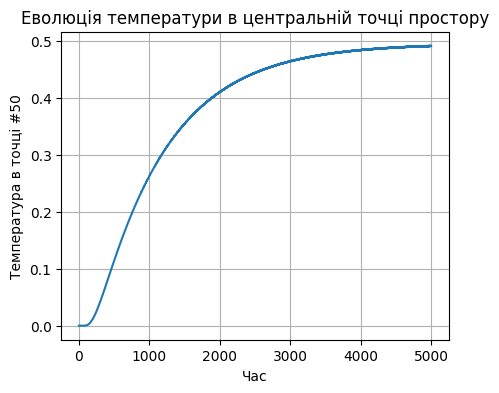

In [8]:
index = size//2  # Вибираємо центральну точку

plt.figure(figsize=(5, 4))
plt.xlabel('Час')
plt.ylabel(f'Температура в точці #{index}')
plt.title('Еволюція температури в центральній точці простору')
plt.plot(solution.t, solution.y[index])
plt.grid(True)
plt.show()

#### Теплова карта всього процесу

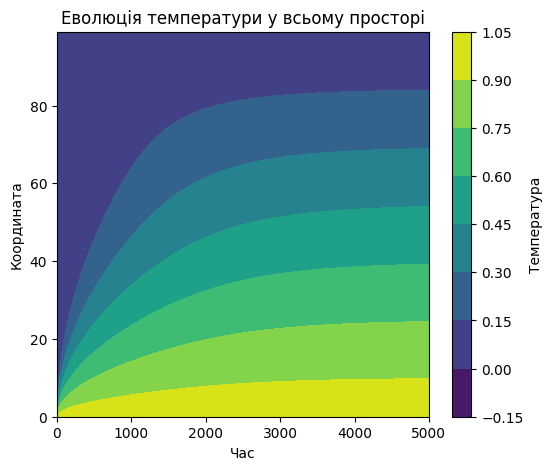

In [9]:
t_list, x_list = np.meshgrid(solution.t, np.arange(size))

plt.figure(figsize=(6, 5))
plt.xlabel('Час')
plt.ylabel('Координата')
plt.title('Еволюція температури у всьому просторі')
plt.contourf(t_list, x_list, solution.y)
plt.colorbar(label='Температура')
plt.show()

## Інший варіант початкових умов

#### *Розглянемо випадок, коли температура підтримується на обох кінцях системи*

#### Задаємо нові параметри часової еволюції

In [10]:
tStart = 0      # Початковий час
tEnd = 2000     # Кінцевий час

#### Створюємо нові початкові умови

In [11]:
u0 = np.zeros([size])  # Спочатку температура скрізь нульова
u0[0] = 1             # Температура = 1 на лівому краї
u0[-1] = 1            # Температура = 1 на правому краї

#### Розв'язуємо систему рівнянь з новими умовами

In [12]:
solution = integrate.solve_ivp(
    f_1D,                                    # Функція правої частини
    [tStart, tEnd],                          # Часовий інтервал
    u0,                                      # Початкові умови
    method='RK45',                           # Метод Рунге-Кутти 4-5 порядку
    t_eval=np.linspace(tStart,tEnd,10001)    # Точки часу для збереження результату
)

### Візуалізація результатів для нових умов

#### Графік температури в центральній точці

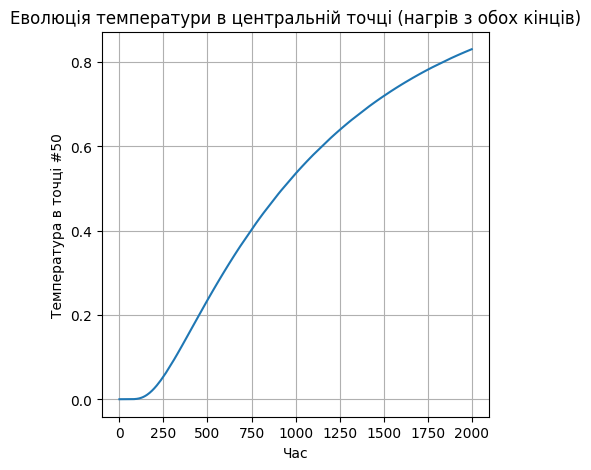

In [13]:
plt.figure(figsize=(5, 5))
plt.xlabel('Час')
plt.ylabel(f'Температура в точці #{index}')
plt.title('Еволюція температури в центральній точці (нагрів з обох кінців)')
plt.plot(solution.t, solution.y[index])
plt.grid(True)
plt.show()

#### Теплова карта всього процесу

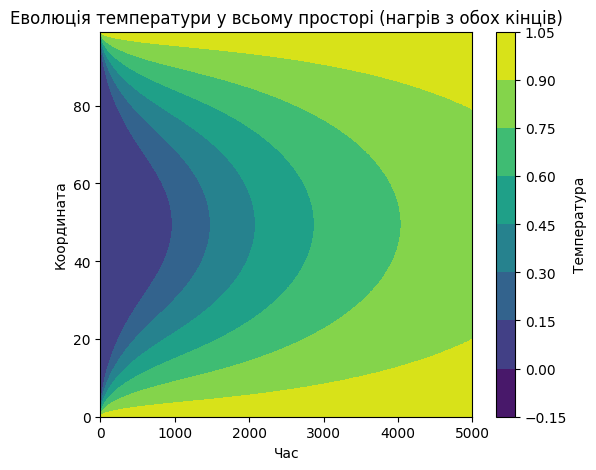

In [14]:
plt.figure(figsize=(6, 5))
plt.xlabel('Час')
plt.ylabel('Координата')
plt.title('Еволюція температури у всьому просторі (нагрів з обох кінців)')
plt.contourf(t_list, x_list, solution.y)
plt.colorbar(label='Температура')
plt.show()

*Для кращого розуміння динаміки процесу розглянемо анімовану версію*: [`heat_equation_multi_1_animated.py`](animation/heat_equation_multi_1_animated.py)

Ускладнюємо граничні умови:
- Підвищена температура на границі
- Збільшена кількість ітерацій
- Аналіз впливу граничних умов

## Моделювання двовимірного розподілу температури в квадратній пластині методом скінченних різниць

Починаємо з простого випадку:
- Квадратна пластина 10x10
- Фіксовані граничні умови
- Базова візуалізація

**Граничні умови**:
- Ліва сторона (x=0): T1 = 80°C
- Нижня сторона (y=max): T2 = 60°C
- Права сторона (x=max): T3 = 45°C
- Верхня сторона (y=0): T4 = 50°C

**Параметри моделювання**:
- Розмір сітки: 10x10 точок
- Кількість ітерацій: 25
- Початкова температура всередині пластини: 25°C

In [15]:
# Розміри сітки
xdim = 10
ydim = 10

In [16]:
# Кількість ітерацій та крок
niter = 25
delta = 1

In [17]:
# Граничні умови (температура на границях пластини)
t1 = 80  # ліва сторона
t2 = 60  # нижня сторона
t3 = 45  # права сторона
t4 = 50  # верхня сторона

In [18]:
# Початкова температура всередині пластини
t_guess = 25

In [19]:
def print_temperature_matrix(matrix, title=""):
    """Функція для форматованого виведення матриці температур"""
    print(f"\n{title}")
    print("-" * 80)
    print("     ", end="")
    print("X", end="\t")
    for j in range(matrix.shape[1]):
        print(f"{j:<7}", end="")
    print("\nY")
    print("-" * 80)
    for i in range(matrix.shape[0]):
        print(f"{i:<4}", end=" ")
        for j in range(matrix.shape[1]):
            print(f"{matrix[i,j]:>7.2f}", end="")
        print()
    print("-" * 80)

In [20]:
# Створення масиву температур та встановлення початкових умов
T = np.zeros((xdim,ydim))

In [21]:
# Виведення нульової матриці
print_temperature_matrix(T, "Нульова матриця температури:")


Нульова матриця температури:
--------------------------------------------------------------------------------
     X	0      1      2      3      4      5      6      7      8      9      
Y
--------------------------------------------------------------------------------
0       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
1       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
2       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
3       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
4       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
5       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
6       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
7       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
8       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
9       0.00   0.00   0.00   0.00   0.00   0

In [22]:
T.fill(t_guess)

In [23]:
# Матриця температури до встановлення граничних умов
print_temperature_matrix(T, "Матриця температури до встановлення граничних умов:")


Матриця температури до встановлення граничних умов:
--------------------------------------------------------------------------------
     X	0      1      2      3      4      5      6      7      8      9      
Y
--------------------------------------------------------------------------------
0      25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00
1      25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00
2      25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00
3      25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00
4      25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00
5      25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00
6      25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00
7      25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00
8      25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00
9      25.00  25.00  

In [24]:
# Встановлення граничних умов
T[0:xdim,0] = t1    # ліва сторона
T[0,1:ydim] = t2    # нижня сторона
T[0:xdim,ydim-1] = t3  # права сторона
T[xdim-1,1:ydim] = t4  # верхня сторона

In [25]:
# Виведення початкового стану
print_temperature_matrix(T, "Початковий розподіл температури:")


Початковий розподіл температури:
--------------------------------------------------------------------------------
     X	0      1      2      3      4      5      6      7      8      9      
Y
--------------------------------------------------------------------------------
0      80.00  60.00  60.00  60.00  60.00  60.00  60.00  60.00  60.00  45.00
1      80.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  45.00
2      80.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  45.00
3      80.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  45.00
4      80.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  45.00
5      80.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  45.00
6      80.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  45.00
7      80.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  45.00
8      80.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  25.00  45.00
9      80.00  50.00  50.00  50.00  50.00

In [26]:
# Ітераційний процес розрахунку методом скінченних різниць
for it in range(0,niter):
    for i in range(1,xdim-1,delta):
        for j in range(1,ydim-1,delta):
            # Розрахунок нової температури в точці як середнє арифметичне
            # температур у сусідніх точках
            T[i,j] = 0.25*(T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

    # Виведення проміжних результатів кожні 5 ітерацій
    if (it + 1) % 5 == 0:
        print_temperature_matrix(T, f"Ітерація {it + 1}:")


Ітерація 5:
--------------------------------------------------------------------------------
     X	0      1      2      3      4      5      6      7      8      9      
Y
--------------------------------------------------------------------------------
0      80.00  60.00  60.00  60.00  60.00  60.00  60.00  60.00  60.00  45.00
1      80.00  63.74  55.69  51.61  49.61  48.82  48.92  49.56  49.47  45.00
2      80.00  63.29  52.12  45.56  42.08  40.64  40.87  42.44  44.35  45.00
3      80.00  62.35  49.64  41.70  37.27  35.37  35.69  38.05  41.59  45.00
4      80.00  61.71  48.22  39.54  34.57  32.38  32.75  35.60  40.18  45.00
5      80.00  61.53  47.82  38.90  33.71  31.41  31.82  34.95  39.88  45.00
6      80.00  61.88  48.61  40.05  35.07  32.88  33.40  36.36  40.71  45.00
7      80.00  62.33  50.38  43.05  38.90  37.19  37.64  39.79  42.63  45.00
8      80.00  60.63  51.60  46.90  44.44  43.47  43.67  44.62  45.56  45.00
9      80.00  50.00  50.00  50.00  50.00  50.00  50.00  50.00

In [27]:
# Виведення фінального розподілу температури
print_temperature_matrix(T, "\nФінальний розподіл температури:")



Фінальний розподіл температури:
--------------------------------------------------------------------------------
     X	0      1      2      3      4      5      6      7      8      9      
Y
--------------------------------------------------------------------------------
0      80.00  60.00  60.00  60.00  60.00  60.00  60.00  60.00  60.00  45.00
1      80.00  68.96  64.08  61.43  59.73  58.46  57.25  55.64  52.57  45.00
2      80.00  71.96  66.23  62.25  59.40  57.18  55.17  52.89  49.70  45.00
3      80.00  72.94  67.05  62.47  58.95  56.16  53.74  51.28  48.41  45.00
4      80.00  73.12  67.10  62.21  58.37  55.32  52.75  50.32  47.77  45.00
5      80.00  72.80  66.54  61.51  57.60  54.55  52.03  49.73  47.43  45.00
6      80.00  71.86  65.23  60.22  56.51  53.71  51.44  49.38  47.28  45.00
7      80.00  69.68  62.66  58.05  54.94  52.70  50.91  49.24  47.36  45.00
8      80.00  64.38  57.90  54.65  52.74  51.45  50.43  49.39  47.94  45.00
9      80.00  50.00  50.00  50.00  50.00

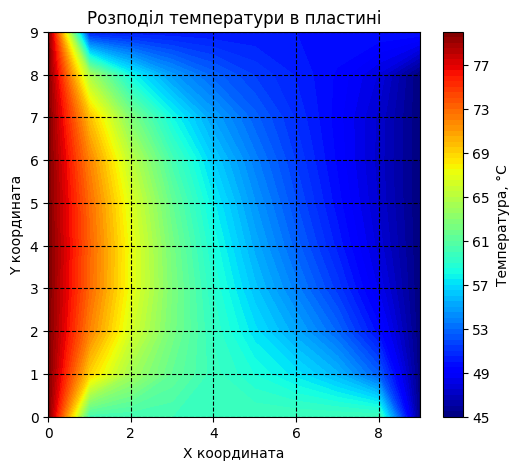

In [28]:
# Візуалізація результатів
plt.figure(figsize=(6,5))
plt.contourf(T,80,cmap='jet')
plt.grid(color='black',linestyle='--')
plt.colorbar(label='Температура, °C')
plt.title('Розподіл температури в пластині')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.show()

Додаємо анімацію у: [`heat_transfer_1x_anim.py`](./heat_transfer_1x_anim.py)

**Аналіз результатів**:

1. Розподіл температури в пластині відповідає фізичним очікуванням:
   температура плавно змінюється від гарячих до холодних границь.
   
2. Найвища температура (80°C) спостерігається на лівій стороні пластини,
   створюючи градієнт температури в напрямку правої сторони (45°C).
   
3. Кількість ітерацій (25) достатня для досягнення стабільного розподілу
   температури при заданих граничних умовах.

**Висновки**:

1. Метод скінченних різниць ефективно моделює стаціонарний розподіл
   температури в двовимірній пластині.
   
2. Візуалізація результатів за допомогою контурного графіка дозволяє
   легко аналізувати розподіл температури.
   
3. Програма може бути використана для моделювання різних теплових
   режимів шляхом зміни граничних умов та параметрів моделювання.

Ускладнюємо граничні умови:
- Підвищена температура на границі
- Збільшена кількість ітерацій
- Аналіз впливу граничних умов

#### Моделювання двовимірного розподілу температури в квадратній пластині методом скінченних різниць з підвищеною температурою

**Граничні умови**:
- Ліва сторона (x=0): T1 = 80°C
- Нижня сторона (y=max): T2 = 60°C
- Права сторона (x=max): T3 = 45°C
- Верхня сторона (y=0): T4 = 120°C (підвищена температура)

**Параметри моделювання**:
- Розмір сітки: 10x10 точок
- Кількість ітерацій: 80
- Початкова температура всередині пластини: 35°C

In [29]:
# Розміри сітки
xdim = 10
ydim = 10

In [30]:
# Граничні умови (температура на границях пластини)
T1 = 80  # ліва сторона
T2 = 60  # нижня сторона
T3 = 45  # права сторона
T4 = 120 # верхня сторона (підвищена температура)

In [31]:
# Початкова температура всередині пластини
T_guess = 35

In [32]:
def print_temperature_matrix(matrix, title=""):
    """Функція для форматованого виведення матриці температур"""
    print(f"\n{title}")
    print("-" * 80)
    print("     ", end="")
    print("X", end="\t")
    for j in range(matrix.shape[1]):
        print(f"{j:<7}", end="")
    print("\nY")
    print("-" * 80)
    for i in range(matrix.shape[0]):
        print(f"{i:<4}", end=" ")
        for j in range(matrix.shape[1]):
            print(f"{matrix[i,j]:>7.2f}", end="")
        print()
    print("-" * 80)

In [33]:
# Створення масиву температур та встановлення початкових умов
T = np.zeros((xdim,ydim))

In [34]:
# Виведення нульової матриці
print_temperature_matrix(T, "Нульова матриця температури:")


Нульова матриця температури:
--------------------------------------------------------------------------------
     X	0      1      2      3      4      5      6      7      8      9      
Y
--------------------------------------------------------------------------------
0       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
1       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
2       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
3       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
4       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
5       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
6       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
7       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
8       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
9       0.00   0.00   0.00   0.00   0.00   0

In [35]:
T.fill(T_guess)

In [36]:
# Матриця температури до встановлення граничних умов
print_temperature_matrix(T, "Матриця температури до встановлення граничних умов:")


Матриця температури до встановлення граничних умов:
--------------------------------------------------------------------------------
     X	0      1      2      3      4      5      6      7      8      9      
Y
--------------------------------------------------------------------------------
0      35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00
1      35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00
2      35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00
3      35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00
4      35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00
5      35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00
6      35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00
7      35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00
8      35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00
9      35.00  35.00  

In [37]:
# Встановлення граничних умов
T[0:xdim,0] = T1    # ліва сторона
T[0,1:ydim] = T2    # нижня сторона
T[0:xdim,ydim-1] = T3  # права сторона
T[xdim-1,1:ydim] = T4  # верхня сторона

In [38]:
# Виведення початкового стану
print_temperature_matrix(T, "Початковий розподіл температури:")


Початковий розподіл температури:
--------------------------------------------------------------------------------
     X	0      1      2      3      4      5      6      7      8      9      
Y
--------------------------------------------------------------------------------
0      80.00  60.00  60.00  60.00  60.00  60.00  60.00  60.00  60.00  45.00
1      80.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  45.00
2      80.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  45.00
3      80.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  45.00
4      80.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  45.00
5      80.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  45.00
6      80.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  45.00
7      80.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  45.00
8      80.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  35.00  45.00
9      80.00 120.00 120.00 120.00 120.00

In [39]:
# Ітераційний процес розрахунку методом скінченних різниць
# Збільшена кількість ітерацій для кращої збіжності
niter = 80
for n in range(0,niter):
    for i in range(1,xdim-1,1):
        for j in range(1,ydim-1,1):
            # Розрахунок нової температури в точці як середнє арифметичне
            # температур у сусідніх точках
            T[i,j] = 0.25*(T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1])

    # Виведення проміжних результатів кожні 5 ітерацій
    if (n + 1) % 5 == 0 and (n + 1) != 25:
        print_temperature_matrix(T, f"Ітерація {n + 1}:")


Ітерація 5:
--------------------------------------------------------------------------------
     X	0      1      2      3      4      5      6      7      8      9      
Y
--------------------------------------------------------------------------------
0      80.00  60.00  60.00  60.00  60.00  60.00  60.00  60.00  60.00  45.00
1      80.00  65.13  58.03  54.50  52.80  52.06  51.88  51.81  50.64  45.00
2      80.00  65.63  56.10  50.54  47.59  46.26  46.00  46.33  46.37  45.00
3      80.00  65.25  54.62  47.99  44.27  42.53  42.25  43.02  44.20  45.00
4      80.00  64.96  53.89  46.76  42.66  40.69  40.39  41.48  43.39  45.00
5      80.00  65.55  54.94  48.02  43.95  41.97  41.72  43.01  44.60  45.00
6      80.00  68.74  60.43  54.82  51.39  49.70  49.60  50.17  49.23  45.00
7      80.00  76.80  73.18  70.03  67.84  66.74  66.37  64.97  59.07  45.00
8      80.00  91.93  93.76  93.18  92.35  91.79  91.08  88.28  78.09  45.00
9      80.00 120.00 120.00 120.00 120.00 120.00 120.00 120.00

In [40]:
# Виведення фінального розподілу температури
print_temperature_matrix(T, "\nФінальний розподіл температури:")



Фінальний розподіл температури:
--------------------------------------------------------------------------------
     X	0      1      2      3      4      5      6      7      8      9      
Y
--------------------------------------------------------------------------------
0      80.00  60.00  60.00  60.00  60.00  60.00  60.00  60.00  60.00  45.00
1      80.00  70.34  66.62  64.78  63.47  62.14  60.45  57.98  53.80  45.00
2      80.00  74.75  71.36  69.03  66.96  64.64  61.67  57.68  52.23  45.00
3      80.00  77.29  75.05  73.00  70.72  67.80  63.92  58.83  52.43  45.00
4      80.00  79.37  78.54  77.22  75.11  71.92  67.37  61.28  53.66  45.00
5      80.00  81.65  82.52  82.22  80.58  77.39  72.38  65.26  55.94  45.00
6      80.00  84.72  87.66  88.58  87.60  84.68  79.49  71.44  59.85  45.00
7      80.00  89.56  94.82  96.84  96.55  94.23  89.48  81.14  67.04  45.00
8      80.00  98.70 105.23 107.40 107.54 106.21 103.07  96.59  82.16  45.00
9      80.00 120.00 120.00 120.00 120.00

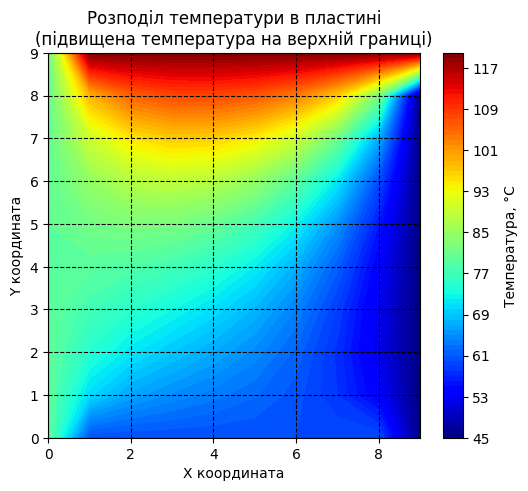

In [41]:
# Візуалізація результатів
plt.figure(figsize=(6,5))
plt.contourf(T,80,cmap='jet')
plt.grid(color='black',linestyle='--')
plt.colorbar(label='Температура, °C')
plt.title('Розподіл температури в пластині\n(підвищена температура на верхній границі)')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.show()

*Додаємо анімацію у*: [`heat_transfer_2x_anim.py`](./heat_transfer_2x_anim.py)

**Аналіз результатів**:

1. У порівнянні з першою задачею, розподіл температури має більший градієнт через значно вищу температуру на верхній границі (120°C).
   
2. Найвища температура (120°C) спостерігається на верхній стороні пластини, що створює інтенсивний теплообмін з іншими частинами пластини.
   
3. Збільшення кількості ітерацій до 80 (порівняно з 25 у першій задачі) забезпечує кращу збіжність рішення при більших перепадах температури.

**Висновки**:

1. Метод скінченних різниць успішно справляється з моделюванням теплопередачі навіть при значних перепадах температури на границях.
   
2. Підвищена температура на нижній границі суттєво впливає на загальний розподіл температури в пластині, створюючи більш виражені градієнти.
   
3. Для задач з більшими перепадами температури потрібна більша кількість ітерацій для досягнення сталого стану.

# Двовимірне рівняння теплопровідності

## Постановка задачі
Даний скрипт розв'язує двовимірне рівняння теплопровідності:

$$ \frac{\partial}{\partial t} u(\vec{r},t) = a \left(\frac{\partial^2}{\partial x^2} u(\vec{r},t) + \frac{\partial^2}{\partial y^2} u(\vec{r},t)\right) $$

де:
- $u(x,y,t)$ - температура в точці $(x,y)$ в момент часу $t$
- $a$ - коефіцієнт температуропровідності
- $t$ - час
- $x, y$ - просторові координати

## Метод розв'язання
1. Використовуємо метод кінцевих різниць для дискретизації просторових похідних
2. Застосовуємо перетворення двовимірного масиву в одновимірний для використання стандартних методів розв'язку
3. Для розв'язку системи використовуємо метод Рунге-Кутти 4-5 порядку
4. Візуалізуємо результати за допомогою контурних графіків

## Теоретичні основи

Двовимірне рівняння теплопровідності описує поширення тепла по площині:

$$ \frac{\partial}{\partial t} u(\vec{r},t) = a \left(\frac{\partial^2}{\partial x^2} u(\vec{r},t) + \frac{\partial^2}{\partial y^2} u(\vec{r},t)\right) $$

де $u(\vec{r},t)$ - температура в точці з координатами $(x,y)$ в момент часу $t$, представлена як двовимірний масив ${u_{1,1}, u_{1,2}, \dots, u_{n,n}}$.

### Дискретизація

Для чисельного розв'язку використовуємо метод кінцевих різниць. Просторові похідні апроксимуються як:

$$ \frac{\partial^2}{\partial x^2} u_{i,j} + \frac{\partial^2}{\partial y^2} u_{i,j} = \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{(\Delta x)^2}+\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{(\Delta y)^2} $$

## Реалізація
Особливості:
- Реалізація для сітки 100x100
- Оптимізація обчислень
- Розширені можливості аналізу результатів

In [42]:
# Визначаємо основні фізичні параметри системи
a = 1.0   # Коефіцієнт температуропровідності
dx = 1.0  # Крок сітки по x
dy = 1.0  # Крок сітки по y

In [43]:
def f_2D_flattened(t, u):
    """
    Допоміжна функція для перетворення двовимірної задачі в одновимірну.
    """
    # Перетворюємо одновимірний масив назад у двовимірний
    u = u.reshape(100, 100)

    # Створюємо масив для похідних
    unew = np.zeros([100, 100])

    # Розраховуємо похідні для всіх внутрішніх точок
    unew[1:-1,1:-1] = (u[2:,1:-1] - 2*u[1:-1,1:-1] + u[:-2,1:-1]) * a/dx**2 + \
                      (u[1:-1,2:] - 2*u[1:-1,1:-1] + u[1:-1,:-2]) * a/dy**2

    # Повертаємо розгорнутий одновимірний масив
    return unew.flatten()

In [44]:
# Визначаємо розміри розрахункової сітки
sizex = 100  # Кількість точок по x
sizey = 100  # Кількість точок по y

In [45]:
# Задаємо параметри часової еволюції
tStart = 0       # Початковий час
tEnd = 10000     # Кінцевий час
n_steps = 10001  # Кількість кроків для збереження результату

In [46]:
# Створюємо початкові умови: нагріті ліва та нижня границі
u0 = np.zeros([sizex, sizey])  # Спочатку температура скрізь нульова
u0[0,:] = 1   # Температура = 1 на лівій границі
u0[:,0] = 1   # Температура = 1 на нижній границі

### Розрахунок для випадку з нагрітими лівою та нижньою границями

In [47]:
# Розв'язуємо систему рівнянь
solution = integrate.solve_ivp(
    f_2D_flattened,
    [tStart, tEnd],
    u0.flatten(),
    method='RK45',
    t_eval=np.linspace(tStart,tEnd,n_steps),
    vectorized=True
)

In [48]:
# Створюємо сітку для візуалізації
x_list, y_list = np.meshgrid(np.arange(sizex), np.arange(sizey))

In [49]:
# Візуалізуємо результати для різних моментів часу

In [50]:
def show_plot(index):
    plt.figure(figsize=(6, 4))
    plt.xlabel('Координата x')
    plt.ylabel('Координата y')
    plt.title(f'Розподіл температури в момент часу (t = {solution.t[index]:.1f})')
    plt.contourf(x_list, y_list, solution.y[:, index].reshape(sizex, sizey))
    plt.colorbar(label='Температура')
    plt.show()

#### Візуалізуємо результати для різних моментів часу

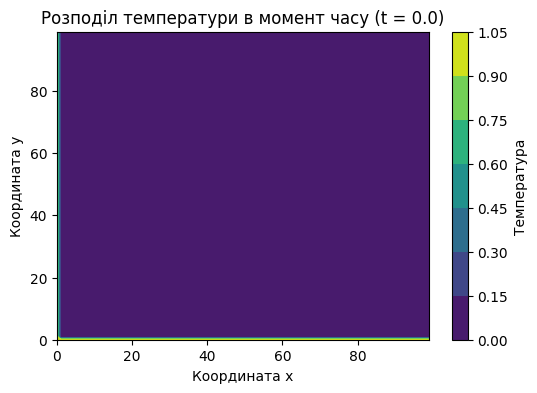

In [51]:
show_plot(0)

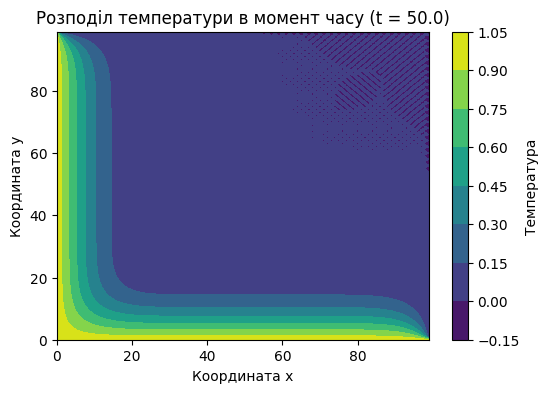

In [52]:
show_plot(n_steps//200)

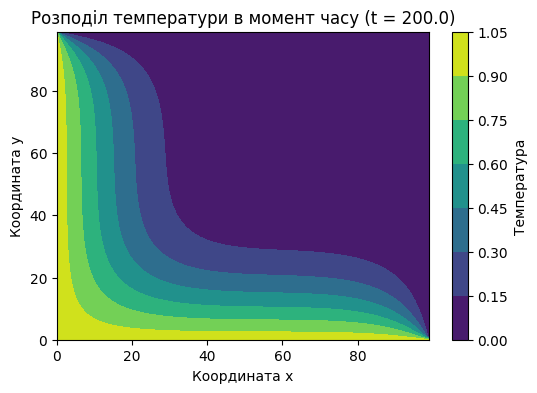

In [53]:
show_plot(n_steps//50)

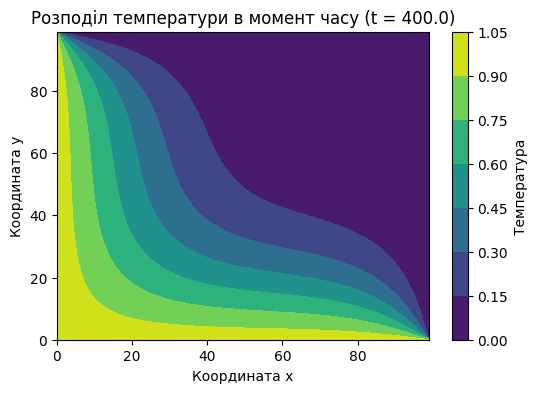

In [54]:
show_plot(n_steps//25)

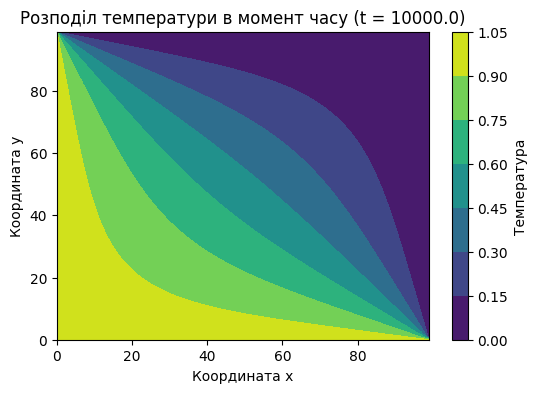

In [55]:
show_plot(-1)

### Розрахунок для випадку з нагрітими всіма границями

In [56]:
# Створюємо нові початкові умови: нагріті всі границі
u0 = np.zeros([sizex,sizey])  # Спочатку температура скрізь нульова
u0[0,:] = 1    # Температура = 1 на лівій границі
u0[:,0] = 1    # Температура = 1 на нижній границі
u0[-1,:] = 1   # Температура = 1 на правій границі
u0[:,-1] = 1   # Температура = 1 на верхній границі

In [57]:
# Розв'язуємо систему рівнянь з новими умовами
solution = integrate.solve_ivp(
    f_2D_flattened,
    [tStart, tEnd],
    u0.flatten(),
    method='RK45',
    t_eval=np.linspace(tStart,tEnd,n_steps),
    vectorized=True
)

### Візуалізуємо результати для різних моментів часу

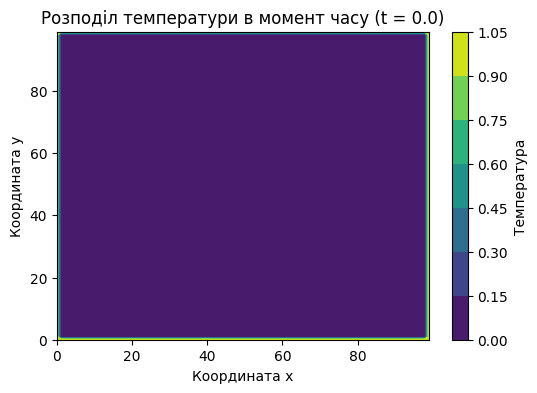

In [58]:
show_plot(0)

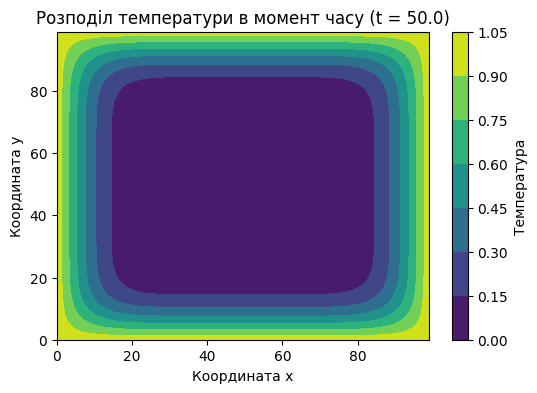

In [59]:
show_plot(n_steps//200)

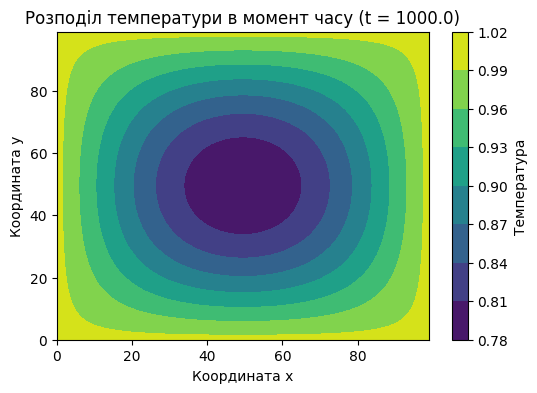

In [60]:
show_plot(n_steps//10)

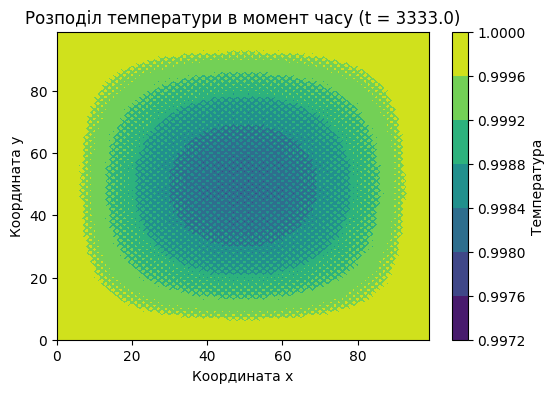

In [61]:
show_plot(n_steps//3)

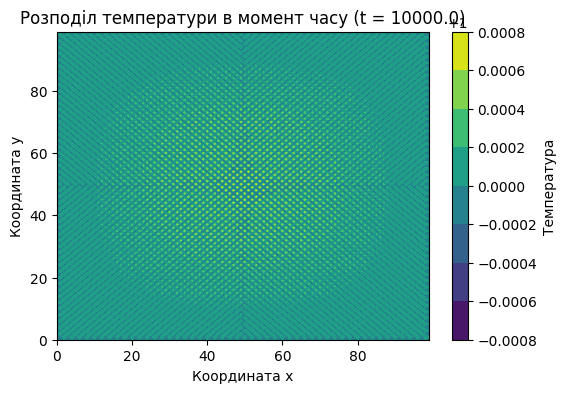

In [62]:
show_plot(-1)